In [1]:
import matplotlib.pyplot as plt

In [4]:
import json

In [3]:
%matplotlib inline

In [8]:
coauthorship_file_names = ["coauthorship_graphs/aps_coauthorship_%d.csv" % (1893+x) for x in range(2013-1893+1)]
edges = {}
vertices = {}

In [9]:
vertices_count_list = []
edges_count_list = []
for file_name in coauthorship_file_names:
    with open(file_name) as year_graph:
        first_line = True
        vertices_count = 0
        edges_count = 0
        for line in year_graph:
            if not first_line:
                v1, v2, w = line.strip().split(",")
                if v1 not in vertices:
                    vertices[v1] = True
                    vertices_count += 1
                if v2 not in vertices:
                    vertices[v2] = True
                    vertices_count += 1
                edge = (v1, v2)
                if edge not in edges:
                    edges_count += 1
                edges[edge] = True
            first_line = False
        vertices_count_list.append(vertices_count)
        edges_count_list.append(edges_count)

In [60]:
with open("co_edges_count_list.json", "w") as edges_file:
    json.dump(edges_count_list, edges_file)
    
with open("co_vertices_count_list.json", "w") as edges_file:
    json.dump(vertices_count_list, edges_file)

In [6]:
years = [1893+x for x in range(2013-1893+1)]

In [41]:
for x in xrange(len(vertices_count_list)-1):
    vertices_count_list[x+1] = vertices_count_list[x+1]+vertices_count_list[x]
    
for x in xrange(len(edges_count_list)-1):
    edges_count_list[x+1] = edges_count_list[x+1]+edges_count_list[x]

In [7]:
average_degree = []
for x in xrange(len(vertices_count_list)):
    average_degree.append((2.*edges_count_list[x])/vertices_count_list[x])

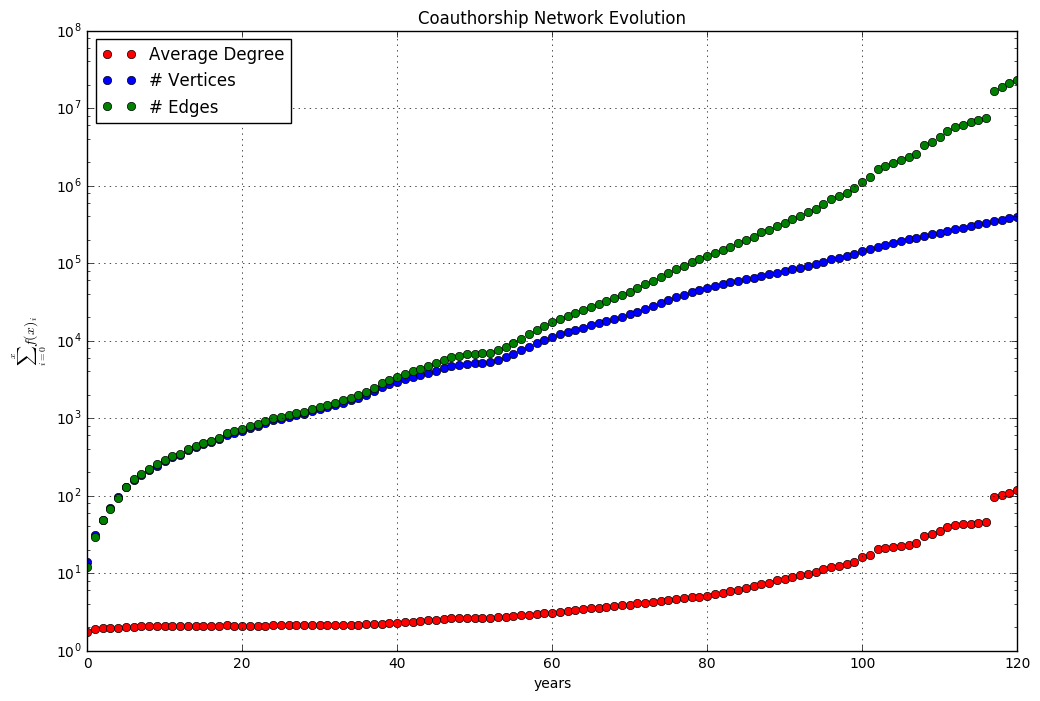

In [9]:
plt.figure(figsize=(12,8))
plt.plot(average_degree,'ro') # plotting t,a separately 
plt.plot(vertices_count_list,'bo') # plotting t,b separately 
plt.plot(edges_count_list,'go') # plotting t,c separately 
plt.yscale("log")
plt.legend(["Average Degree", "# Vertices", "# Edges"], loc='upper left')
plt.title("Coauthorship Network Evolution")
plt.xlabel("years")
plt.ylabel(r'$\sum_{i=0}^x f(x)_i$')
#plt.xlim([1893, 2013])
plt.grid(True)
plt.savefig("coauthorship_network_evolution.png")
plt.savefig("coauthorship_network_evolution.eps")
plt.show()